# Apparel Recommendation Engine

In [1]:
#importing all the necessary packages for project

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
warnings.filterwarnings("ignore")

Exploring dataset

In [2]:
data = pd.read_json('tops_fashion.json')
data

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183133,None,B01MSALTSO,OUTERWEAR,$14.58,None,Black,TOOGOO(R),None,Usually ships in 1-2 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,089106A4,https://images-na.ssl-images-amazon.com/images...,None,<b>* TOOGOO is a registered trademark. ONLY Au...
183134,None,B015W98YQK,SHIRT,None,None,Monochrome Plaid,VOGUE CODE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None,https://images-na.ssl-images-amazon.com/images...,None,"SIZE CHART <p> XS for length of front 27.6""; l..."
183135,None,B075756PGC,SHIRT,None,None,Pink,Wrangler,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wrangler George Strait For Her Long Sleeve Pin...,LGS7089,https://images-na.ssl-images-amazon.com/images...,None,Pretty pink print button down Western shirt fr...
183136,None,B074L8FVTT,SHIRT,$44.99,None,Rose,susana monaco,susana monaco,Usually ships in 2-3 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Susana Monaco Womens Susana Monoco Sleeveless ...,None,https://images-na.ssl-images-amazon.com/images...,susana monaco,Color/pattern: rose. Approximately 23in from s...


In [3]:
print("Number of data points : ",data.shape[0],", Number of features/variables : ",data.shape[1])

Number of data points :  183138 , Number of features/variables :  19


In [4]:
print("Columns of the dataset are : ")
data.columns

Columns of the dataset are : 


Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

### Using describe() on each and every column of the dataset 

In [5]:
print(data['sku'].describe())

count                           363
unique                          363
top       HT-2001_Cranberry-1167-XL
freq                              1
Name: sku, dtype: object


In [6]:
print(data['asin'].describe())

count         183138
unique        183138
top       B07341J4Z1
freq               1
Name: asin, dtype: object


In [7]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [8]:
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [9]:
print(data['author'].describe())

count                                1
unique                               1
top       By (author) Gooseberry Patch
freq                                 1
Name: author, dtype: object


In [10]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [11]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [12]:
print(data['publisher'].describe())

count         42899
unique         3872
top       Fifth Sun
freq            261
Name: publisher, dtype: object


In [13]:
print(data['availability'].describe())

count                                  24532
unique                                    15
top       Usually ships in 1-2 business days
freq                                   12252
Name: availability, dtype: object


In [14]:
print(data['availability_type'].describe())

count     24559
unique        3
top         now
freq      24525
Name: availability_type, dtype: object


In [15]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [16]:
print(data['model'].describe())

count               62370
unique              56692
top       Gillberry-65876
freq                  171
Name: model, dtype: object


In [17]:
print(data['manufacturer'].describe())

count         42899
unique         3872
top       Fifth Sun
freq            261
Name: manufacturer, dtype: object


### Truncating dataset to 7 columns

In [3]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]
data

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
...,...,...,...,...,...,...,...
183133,B01MSALTSO,TOOGOO(R),Black,https://images-na.ssl-images-amazon.com/images...,OUTERWEAR,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,$14.58
183134,B015W98YQK,VOGUE CODE,Monochrome Plaid,https://images-na.ssl-images-amazon.com/images...,SHIRT,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None
183135,B075756PGC,Wrangler,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Wrangler George Strait For Her Long Sleeve Pin...,None
183136,B074L8FVTT,susana monaco,Rose,https://images-na.ssl-images-amazon.com/images...,SHIRT,Susana Monaco Womens Susana Monoco Sleeveless ...,$44.99


In [19]:
print("Number of data points : ",data.shape[0],", Number of features/variables : ",data.shape[1])

Number of data points :  183138 , Number of features/variables :  7


In [20]:
#describing about the asin variable 
print(data['asin'].describe())

count         183138
unique        183138
top       B07341J4Z1
freq               1
Name: asin, dtype: object


It is clear that all the asin numbers are unique 

In [21]:
#describing about the brand variable
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


It is known that there are 10577 unique brands and Zago brand is frequent

In [22]:
#10 most frequent brands info
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [23]:
#describing about the color variable
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


There are 7380 unique colors and black is most frequent color

In [24]:
#10 most frequent colors.
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [25]:
#describing about the product_type_name variable
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


72 unique product types and shirt is a frequent product type

In [27]:
#names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [28]:
#10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [29]:
#describing about the title variable
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


Most of the products titles are unique and Nakoda Cotton Self Print Straight Kurti For Women title was repeated for 77 times

In [30]:
#describing about the formatted_price variable
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


3135 unique formatted_price values and $19.99 is price for maximum items

In [31]:
#10 most frequent prices
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [32]:
#adding all data to a pickle file
data.to_pickle('pickles/apparel_data')

### Data Cleaning

In [4]:
#removing the rows which are having null values for price 
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points after eliminating price=NULL :', data.shape[0])

Number of data points after eliminating price=NULL : 28395


In [5]:
#removing the rows which are having nulls values for color
data = data.loc[~data['color'].isnull()]
print('Number of data points after eliminating color=NULL :', data.shape[0])

Number of data points after eliminating color=NULL : 28385


In [6]:
data.to_pickle('pickles/28k_apparel_data')

In [14]:
data=pd.read_pickle('pickles/28k_apparel_data')

In [15]:
#removing the products whose titles are too short that is the titles whose number of words are less than 5
data_sorted = data[data['title'].apply(lambda x: len(x.split())>5)]
print("Number of data points after removal of products with short description/title:", data_sorted.shape[0])

Number of data points after removal of products with short description/title: 27255


In [16]:
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32
...,...,...,...,...,...,...,...
12050,B06WRW8RQ1,AJ,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""Life is a Journey"" Self-Help DIY T-Shirt (Wom...",$9.38
40451,B073SKNQHD,The Workout Princess,Premium Heather Gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""I Workout To Burn off The Crazy"", Tri Blend T...",$24.99
109599,B00KI3VDXM,Crazy4Bling,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""I Wanna Be Adored"" Long Sleeve Top with Shred...",$39.99
78827,B003IDE8XQ,Maggie's Organics,Grey,https://images-na.ssl-images-amazon.com/images...,HOME,"""Camisoles Grey - Medium Fair Labor, 1 pc""",$18.99


#### Number of exactly same titles

In [17]:
print('Number of products having duplicated titles are:',sum(data_sorted.duplicated('title')))

Number of products having duplicated titles are: 1981


#### Removing titles which only differs in the last 2 words

In [40]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [41]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    a = data['title'].loc[indices[i]].split()
    j = i+1
    while j < num_data_points:
        b = data['title'].loc[indices[j]].split()
        length = max(len(a), len(b))
        count  = 0
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1
        # if the number of words in which both strings differ are < 2 , we are considering those two apperals as almost same, hence we are ignoring them
        if (length - count) > 2:
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [42]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [43]:
print('Number of data points : ', data.shape[0])

Number of data points :  17286


In [44]:
data.to_pickle('pickles/17k_apperal_data')

In [46]:
data = pd.read_pickle('pickles/17k_apperal_data')

In [47]:
indices = []
for i,row in data.iterrows():
    indices.append(i)

In [ ]:
stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    a = data['title'].loc[i].split()
    for j in indices:
        b = data['title'].loc[j].split()
        length = max(len(a),len(b))
        count  = 0
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1
        # if the number of words in which both strings differ are < 3 , we are considering those two apperals as almost same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [59]:
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [60]:
print('Number of data points after stage two of dedupe: ',data.shape[0])

Number of data points after stage two of dedupe:  16176


In [61]:
data.to_pickle('pickles/16k_apperal_data')

In [2]:
data=pd.read_pickle('pickles/16k_apperal_data')

### Stop words removal

In [3]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {"mightn't", 'few', 'then', 'other', 'shan', 'has', 'own', 'for', 'yourself', 'there', 'his', 'am', 'its', 'because', 'are', 'further', 'during', 'between', 'how', "shan't", 'wasn', 'this', 'd', 'as', 'hadn', 'ma', 'out', 'been', 'down', 'y', 'it', "weren't", 'can', 'but', 'didn', 'whom', 'my', 'she', 'these', 'before', 'ours', 'have', "you'll", 'here', 'some', "wouldn't", 'until', 'more', 'by', 'shouldn', "it's", 'of', "won't", 'while', 'doing', 'hasn', 'them', 'into', 'such', "you'd", 'up', 'should', "couldn't", 'why', "wasn't", 'himself', 'had', "don't", 'aren', 'nor', 'itself', 'haven', 'on', "shouldn't", 'her', 'being', "doesn't", 'be', 'when', 'herself', 'their', 'isn', 'is', 'a', 'what', 'ourselves', 'only', 'theirs', 'most', "hasn't", 'that', 'where', 'if', 'with', 'you', "aren't", 'above', 'now', 'below', 'over', 'do', 'o', 'so', 'll', 'myself', 'which', 'from', 'at', 's', 'no', 'needn', 'ain', 'who', 'me', 'off', 'he', "isn't", 'through', 'was', 'an', 'tha

In [4]:
start_time = time.process_time()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.process_time() - start_time, "seconds")

8.203125 seconds


In [5]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [6]:
data.to_pickle('pickles/16k_apparel_data_preprocessed')

In [2]:
data=pd.read_pickle('pickles/16k_apparel_data_preprocessed')

In [3]:
data

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95
...,...,...,...,...,...,...,...
183092,B01LY4QWLF,Vintage America,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,vintage america womens large lace collared blo...,$23.24
183096,B07167SCNH,Tart Collections,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,tart womens collections ann wrap top xs black,$29.99
183101,B07575N2WX,Soprano,Gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,soprano womens small tiefringe slubknit tank t...,$22.83
183108,B06WLNR267,Shawhuaa,Rosy,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens basic loose low v neck racerback sport ...,$16.99


### Utility functions

In [4]:
#For displaying an image
def display_img(url,ax,fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)) 
    plt.imshow(img)

#for plotting heatmap  
def plot_heatmap(keys, values, labels, url, text):
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,5))
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys)
        ax.set_title(text)
        ax = plt.subplot(gs[1])
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        display_img(url, ax, fig)
        plt.show()
        
#for plotting heatmap image    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    keys = list(vec2.keys()) 
    values = [vec2[x] for x in vec2.keys()]
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, url, text)

#converting the text to the vector representation
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)

#main calling function
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(16176, 12559)

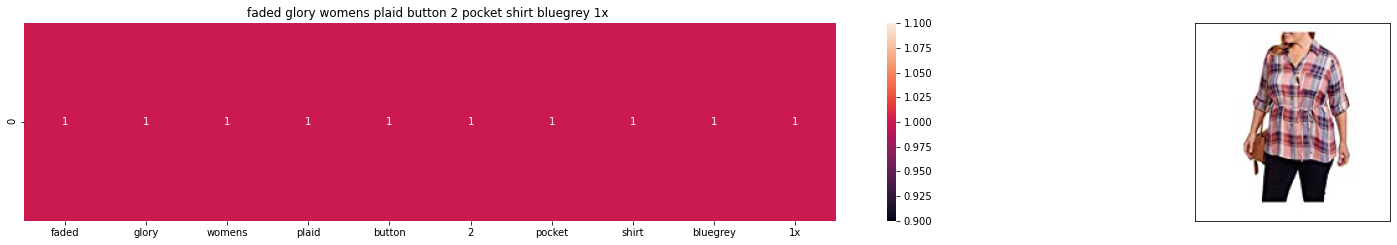

ASIN : B01NCO06S0
Brand: Faded Glory
Title: faded glory womens plaid button 2 pocket shirt bluegrey 1x 
Euclidean similarity with the query image : 0.0
Amazon Url: www.amazon.com/dp/B01NCO06S0


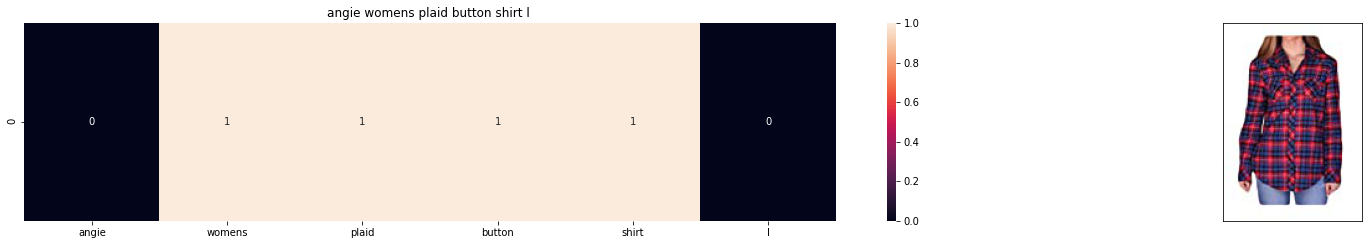

ASIN : B06XKHQ5P5
Brand: Angie
Title: angie womens plaid button shirt l 
Euclidean similarity with the query image : 2.449489742783178
Amazon Url: www.amazon.com/dp/B06XKHQ5P5


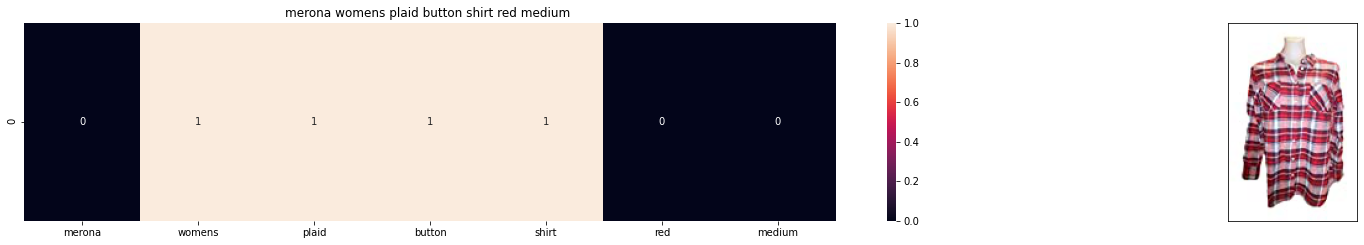

ASIN : B071KZPJF7
Brand: Merona
Title: merona womens plaid button shirt red medium 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B071KZPJF7


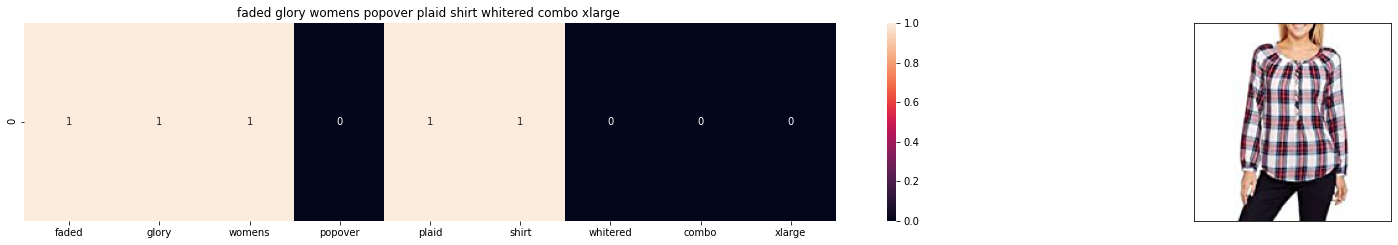

ASIN : B06XY46VS6
Brand: Faded Glory
Title: faded glory womens popover plaid shirt whitered combo xlarge 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B06XY46VS6


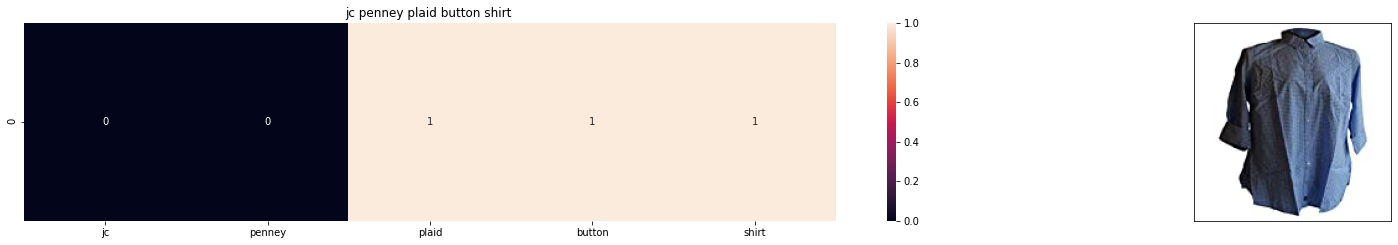

ASIN : B011JPHUSY
Brand: Jc Penney
Title: jc penney plaid button shirt 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B011JPHUSY


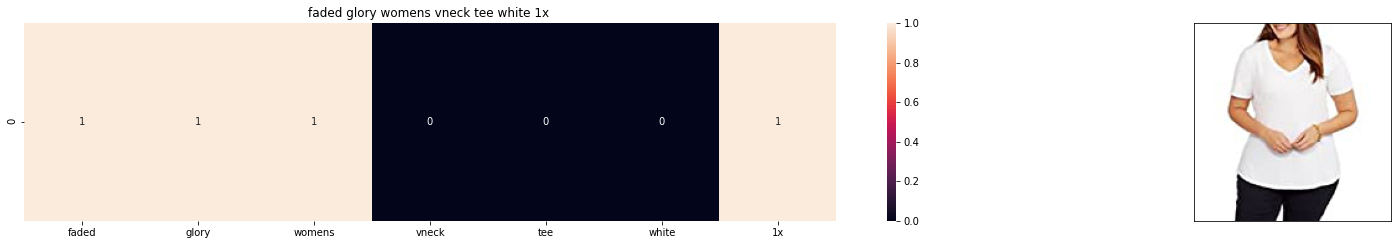

ASIN : B06XT63P1X
Brand: Faded Glory
Title: faded glory womens vneck tee white 1x 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B06XT63P1X


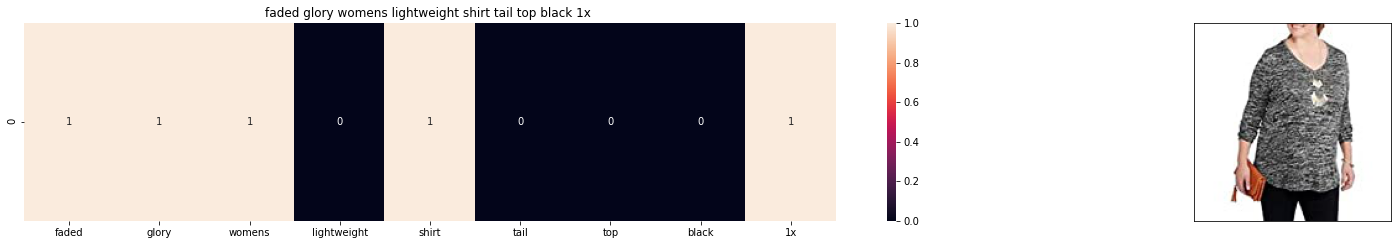

ASIN : B06XKQCBJD
Brand: Faded Glory
Title: faded glory womens lightweight shirt tail top black 1x 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B06XKQCBJD


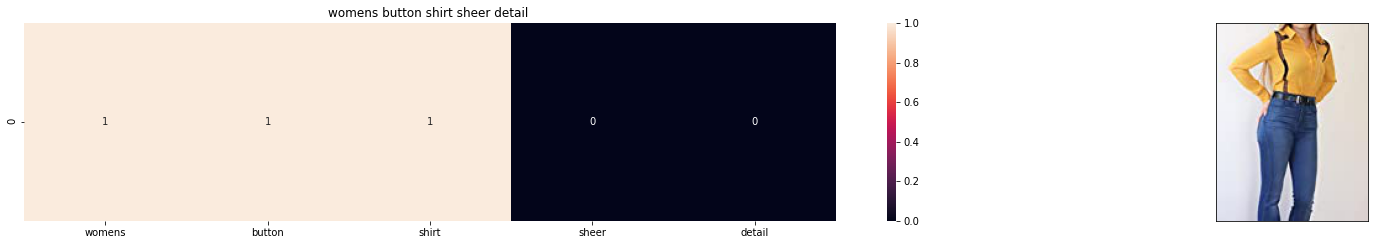

ASIN : B0756RHHHV
Brand: Have
Title: womens button shirt sheer detail 
Euclidean similarity with the query image : 2.8284271247461903
Amazon Url: www.amazon.com/dp/B0756RHHHV


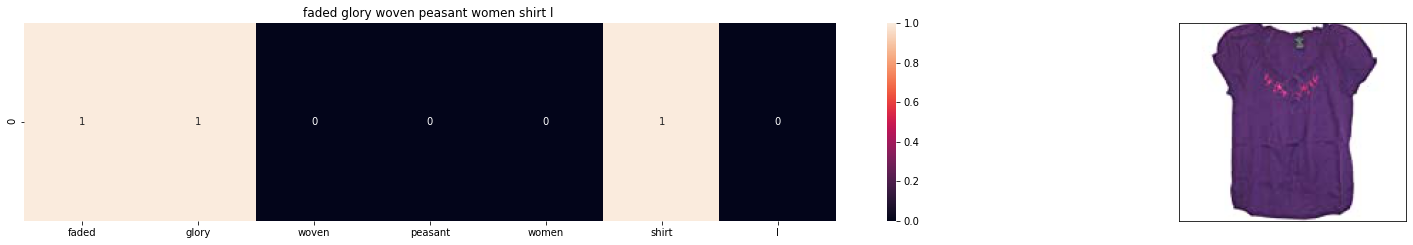

ASIN : B00LMK7YMY
Brand: Faded Glory
Title: faded glory woven peasant women shirt l 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B00LMK7YMY


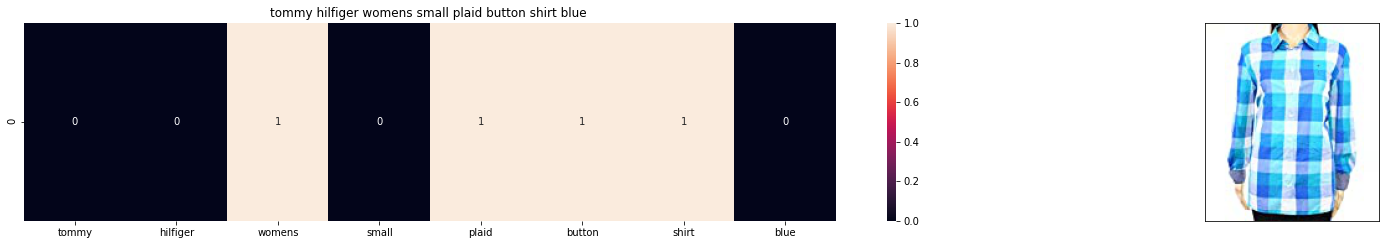

ASIN : B0759NSBCL
Brand: Tommy Hilfiger
Title: tommy hilfiger womens small plaid button shirt blue 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B0759NSBCL


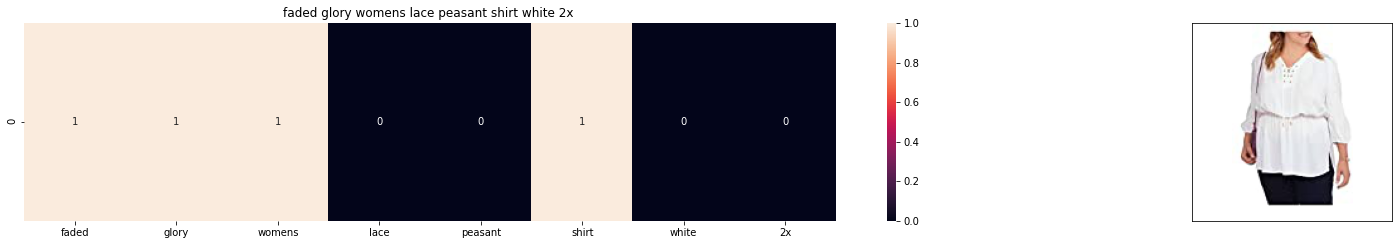

ASIN : B01MR26MXN
Brand: Faded Glory
Title: faded glory womens lace peasant shirt white 2x 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B01MR26MXN


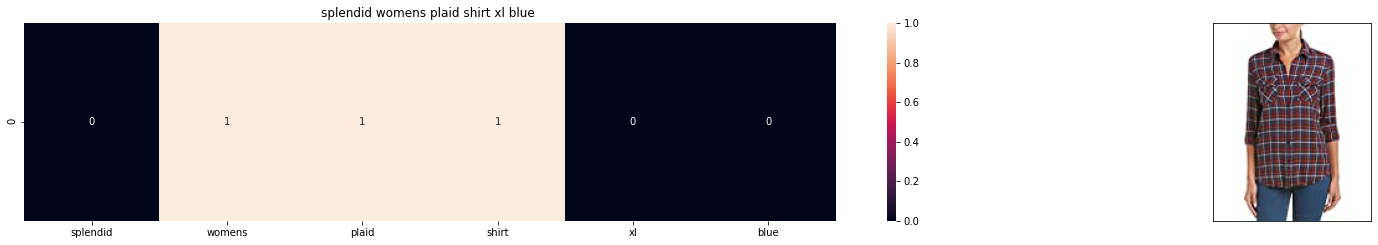

ASIN : B072KNKP98
Brand: Splendid
Title: splendid womens plaid shirt xl blue 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B072KNKP98


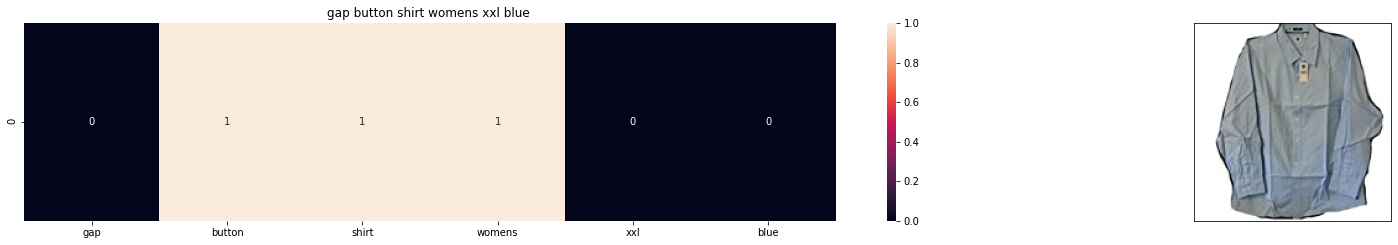

ASIN : B0711S2QR1
Brand: Gap Select Classic
Title: gap button shirt womens xxl blue 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B0711S2QR1


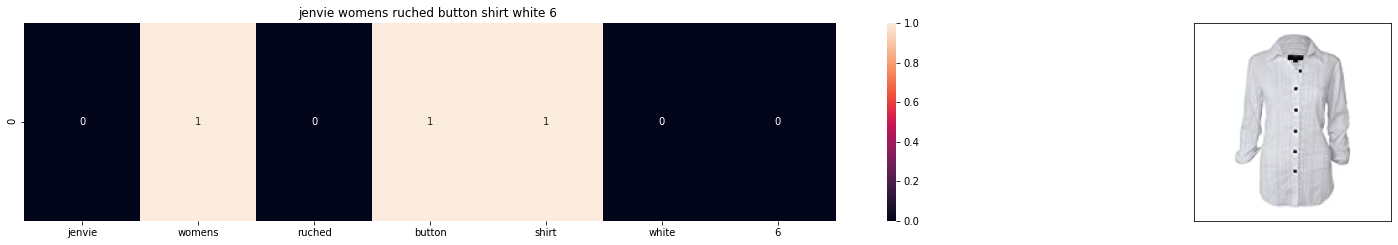

ASIN : B0746SKZ99
Brand: J'ENVIE
Title: jenvie womens ruched button shirt white 6 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B0746SKZ99


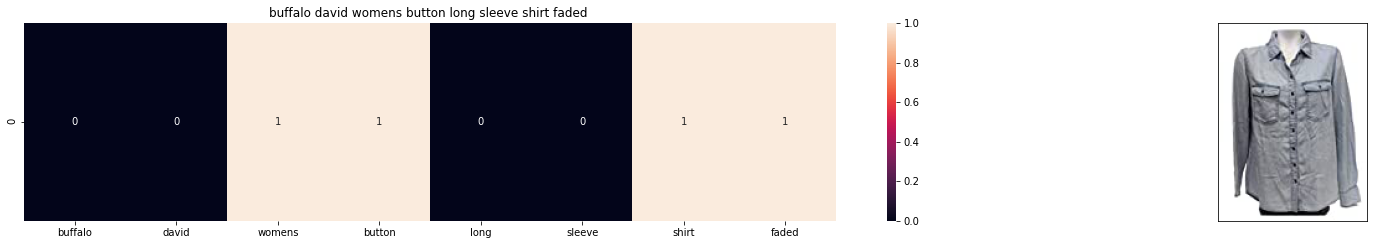

ASIN : B01M0OPK9Q
Brand: Buffalo
Title: buffalo david womens button long sleeve shirt faded 
Euclidean similarity with the query image : 3.0
Amazon Url: www.amazon.com/dp/B01M0OPK9Q


In [6]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('Amazon Url: www.amazon.com/dp/'+ data['asin'].loc[df_indices[i]])
        print('='*75)

bag_of_words_model(16175, 15)
#16175 is the last one


## TF-IDF Model implementation

In [7]:
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    for i in range(1,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('www.amazon.com/dp/'+ data['asin'].loc[df_indices[i]])
        print('='*75)
#tfidf_model(13331, 15)

Enter title of data : 
zebra long sleeve shirt
Number of products to be recommended : 
23

						TF-IDF Result




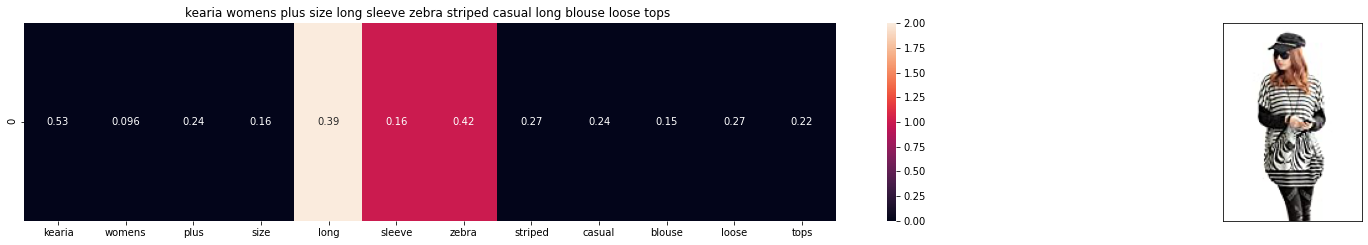

ASIN : B01CG4P8YK
BRAND : Kearia
Eucliden distance from the given image : 0.9585668857010684
www.amazon.com/dp/B01CG4P8YK


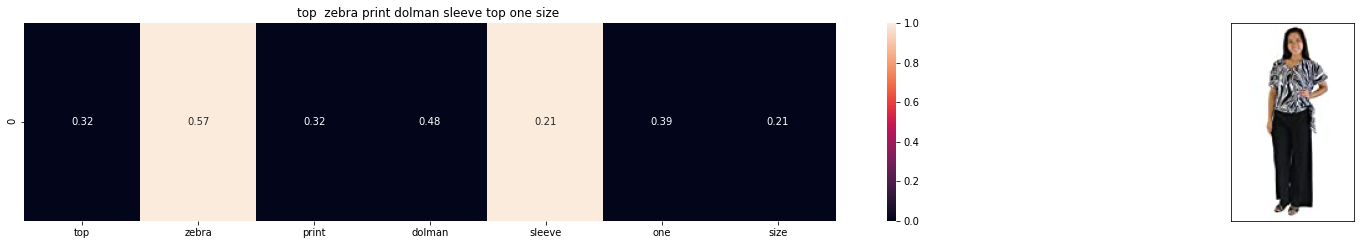

ASIN : B00H8A6ZLI
BRAND : Vivian's Fashions
Eucliden distance from the given image : 0.9678490967866376
www.amazon.com/dp/B00H8A6ZLI


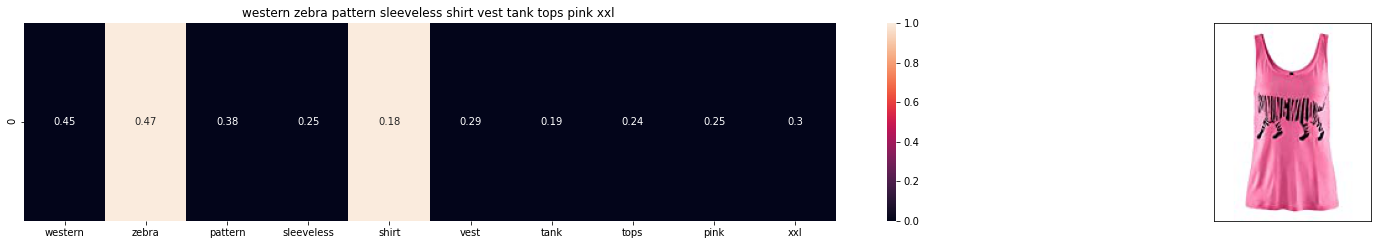

ASIN : B00Z6HEXWI
BRAND : Black Temptation
Eucliden distance from the given image : 1.0554001105403166
www.amazon.com/dp/B00Z6HEXWI


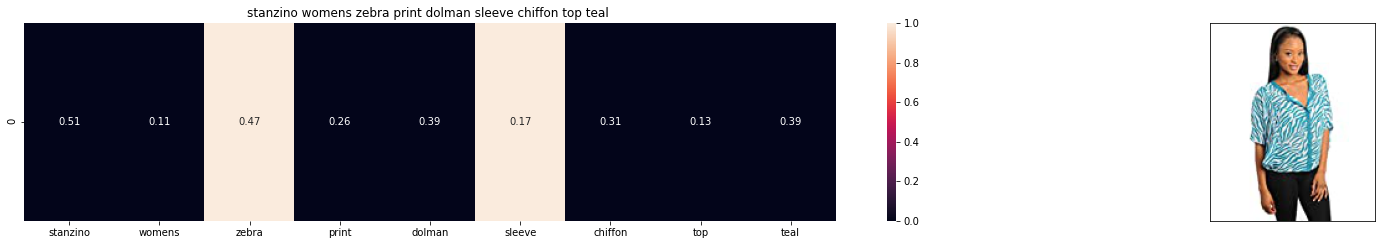

ASIN : B00C0I3U3E
BRAND : Stanzino
Eucliden distance from the given image : 1.0650063445708666
www.amazon.com/dp/B00C0I3U3E


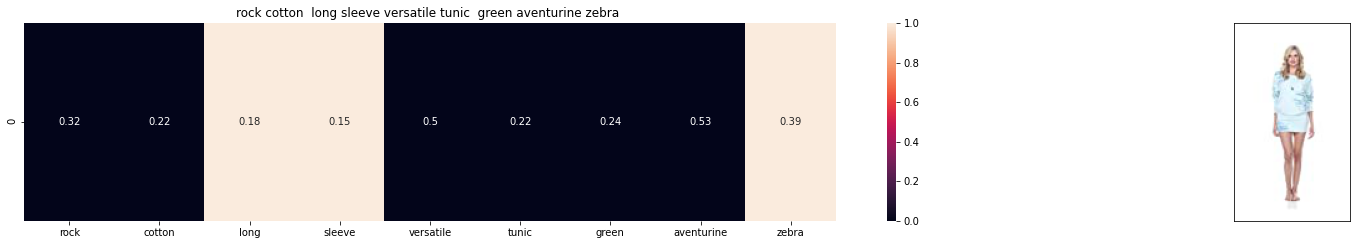

ASIN : B01F2LDC60
BRAND : Rock Cotton
Eucliden distance from the given image : 1.0664613309710764
www.amazon.com/dp/B01F2LDC60


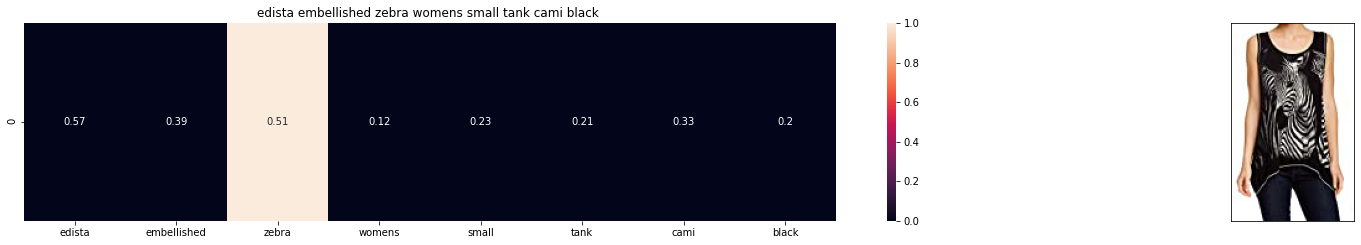

ASIN : B074P8MD22
BRAND : Edista
Eucliden distance from the given image : 1.079200932503703
www.amazon.com/dp/B074P8MD22


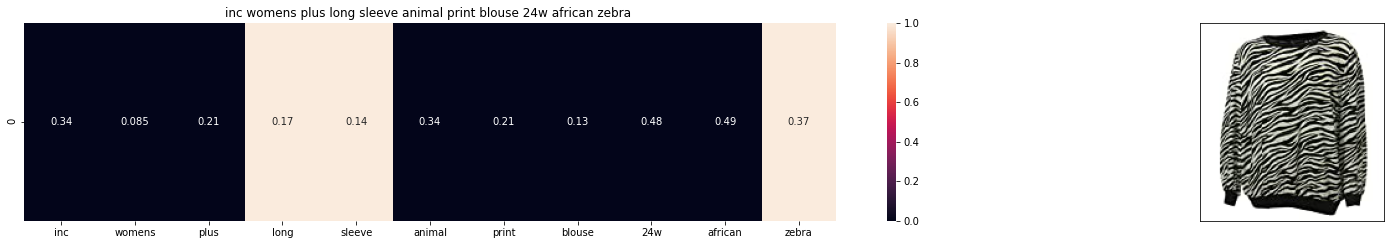

ASIN : B018WDJCUA
BRAND : INC - International Concepts Woman
Eucliden distance from the given image : 1.0836113024803962
www.amazon.com/dp/B018WDJCUA


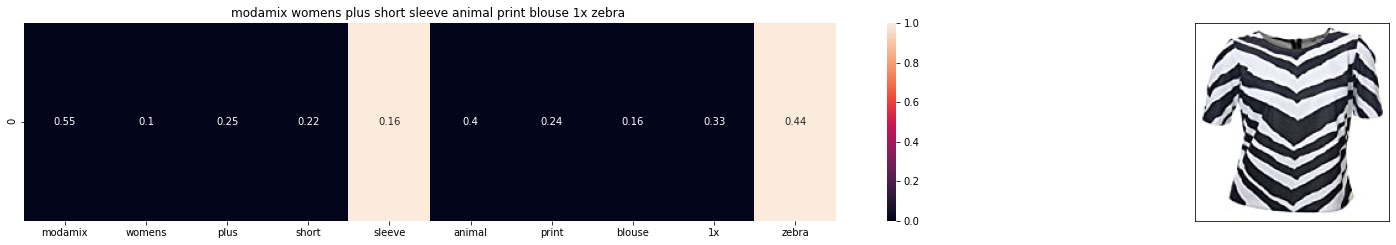

ASIN : B01DSAAHAG
BRAND : Modamix Woman
Eucliden distance from the given image : 1.084474003542337
www.amazon.com/dp/B01DSAAHAG


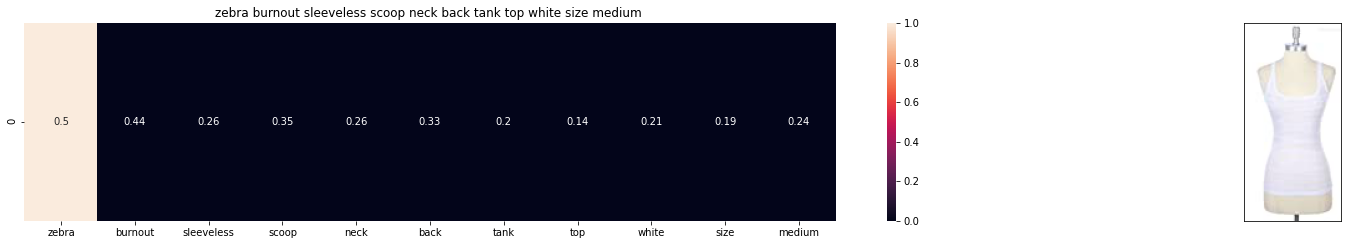

ASIN : B06XGYTZ49
BRAND : Concert
Eucliden distance from the given image : 1.0876691504334646
www.amazon.com/dp/B06XGYTZ49


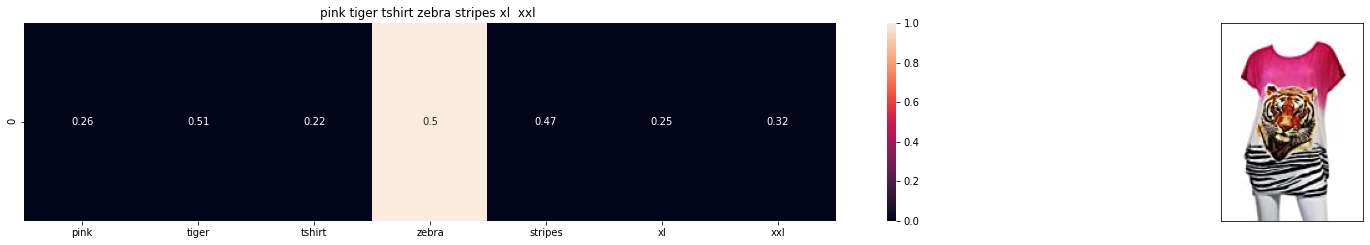

ASIN : B00JXQASS6
BRAND : Si Row
Eucliden distance from the given image : 1.0907484088204291
www.amazon.com/dp/B00JXQASS6


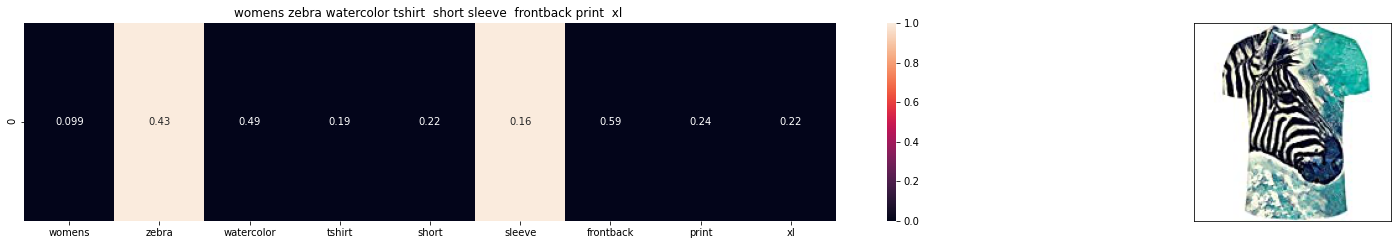

ASIN : B072R2JXKW
BRAND : WHAT ON EARTH
Eucliden distance from the given image : 1.092431120192781
www.amazon.com/dp/B072R2JXKW


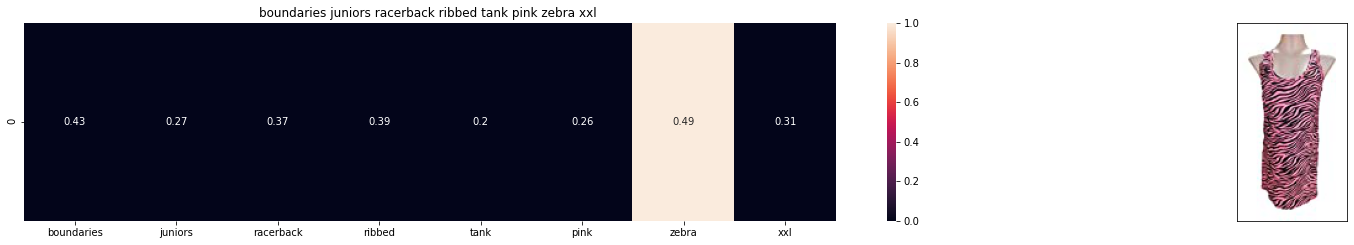

ASIN : B06Y2GTYPM
BRAND : No Boundaries
Eucliden distance from the given image : 1.0927367552776206
www.amazon.com/dp/B06Y2GTYPM


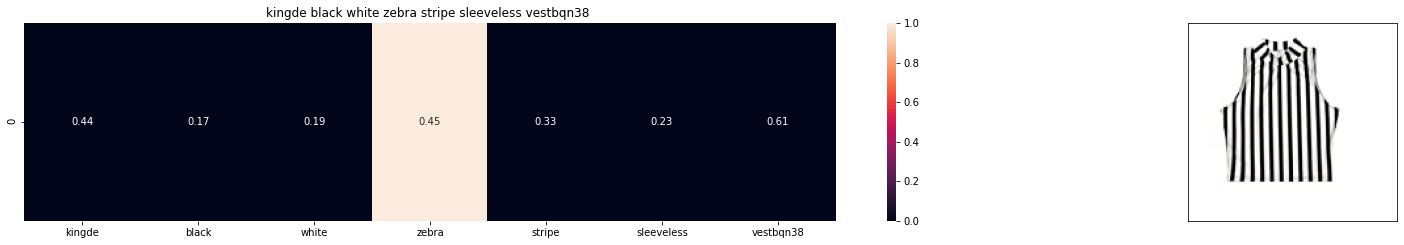

ASIN : B015H41F6G
BRAND : KINGDE
Eucliden distance from the given image : 1.125535118842923
www.amazon.com/dp/B015H41F6G


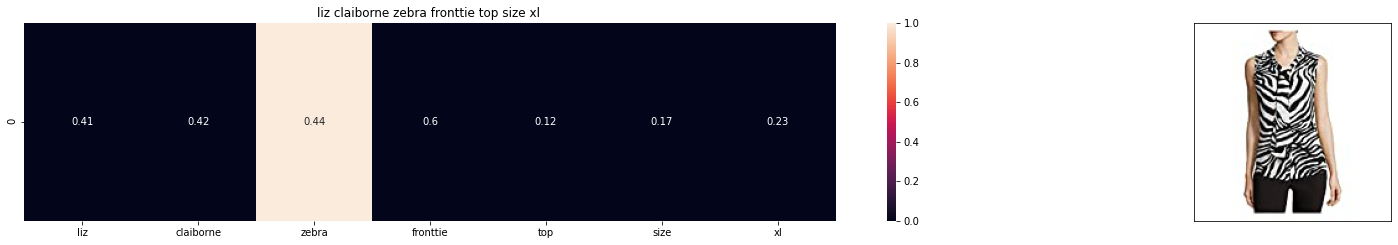

ASIN : B06XBY5QXL
BRAND : Liz Claiborne
Eucliden distance from the given image : 1.129331176200812
www.amazon.com/dp/B06XBY5QXL


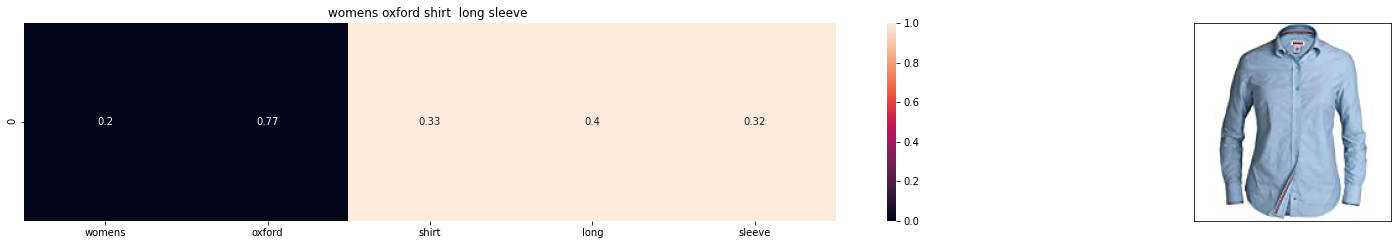

ASIN : B01577JZOC
BRAND : Boast
Eucliden distance from the given image : 1.1382160765028957
www.amazon.com/dp/B01577JZOC


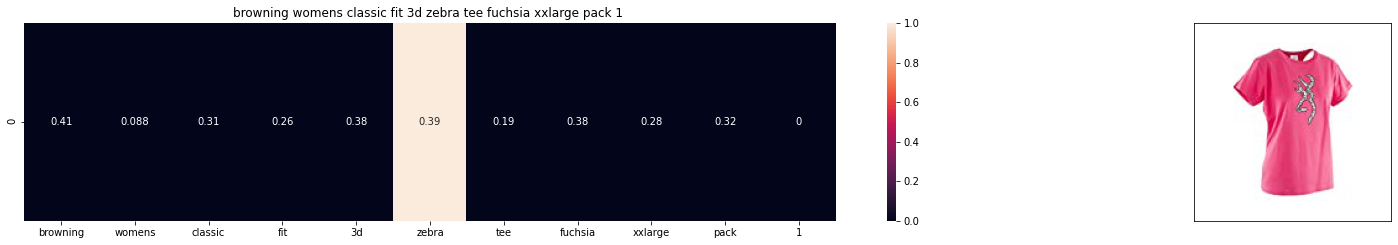

ASIN : B074KQ9P3W
BRAND : Browning
Eucliden distance from the given image : 1.1695166784386897
www.amazon.com/dp/B074KQ9P3W


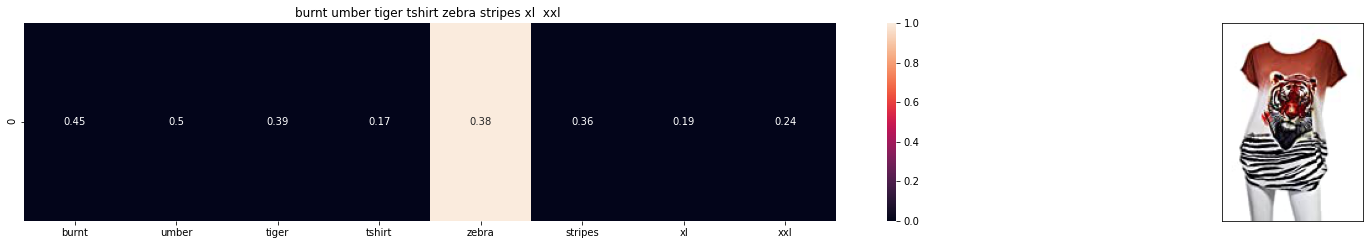

ASIN : B00JXQB5FQ
BRAND : Si Row
Eucliden distance from the given image : 1.173517011275425
www.amazon.com/dp/B00JXQB5FQ


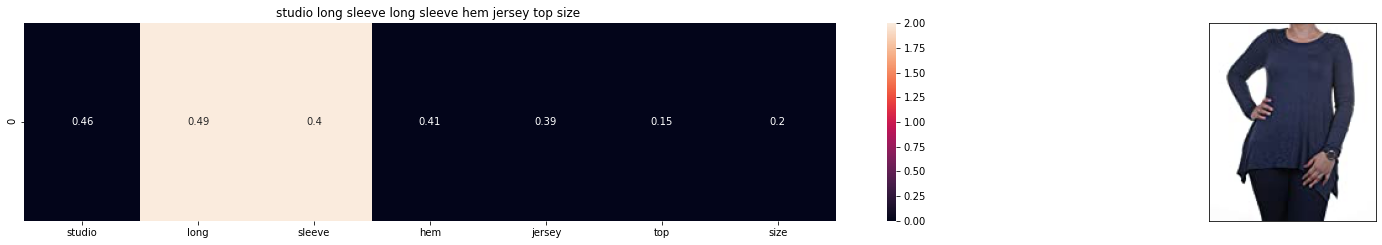

ASIN : B018B9E2A0
BRAND : Studio M
Eucliden distance from the given image : 1.1770642537410094
www.amazon.com/dp/B018B9E2A0


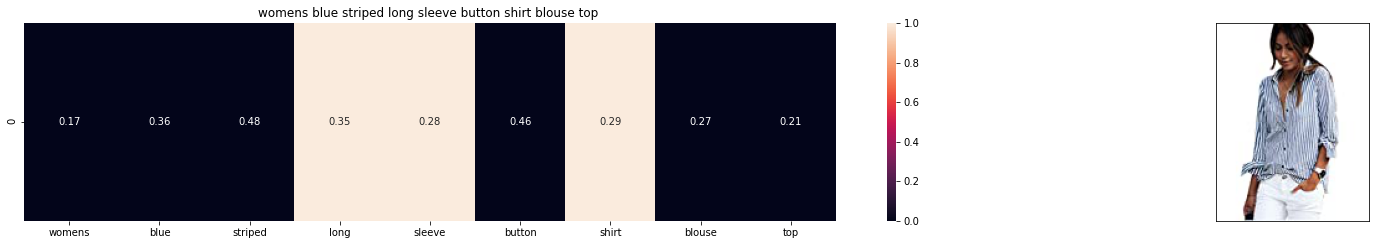

ASIN : B01KM2OLIW
BRAND : Voguegirl
Eucliden distance from the given image : 1.1783194485423687
www.amazon.com/dp/B01KM2OLIW


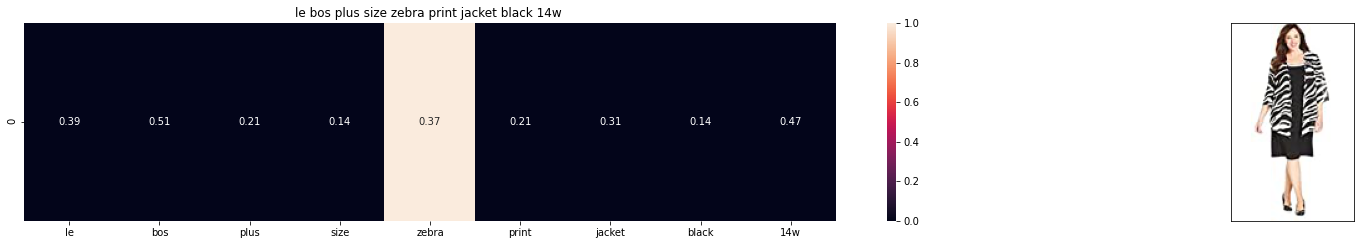

ASIN : B01BO1XRK8
BRAND : Le Bos
Eucliden distance from the given image : 1.1786061453850163
www.amazon.com/dp/B01BO1XRK8


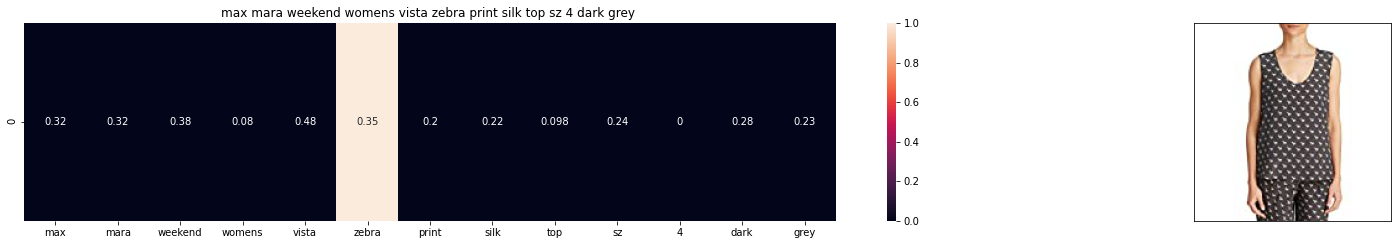

ASIN : B07192WHD5
BRAND : MaxMara
Eucliden distance from the given image : 1.1921901623627624
www.amazon.com/dp/B07192WHD5


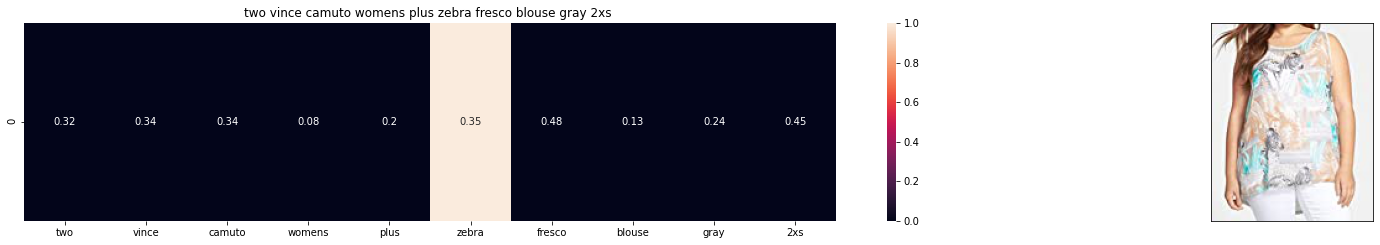

ASIN : B074MJRGW6
BRAND : Two by Vince Camuto
Eucliden distance from the given image : 1.1939356713031384
www.amazon.com/dp/B074MJRGW6


In [8]:
print("Enter title of data : ")
t=input()
print("Number of products to be recommended : ")
n=int(input())
df=['','','','','',t,'']
data.loc[-1]=df
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
print("\n\t\t\t\t\t\tTF-IDF Result\n\n")
tfidf_model(-1, n)